In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
csv_path = "../sample_hydrograph.csv"

df = pd.read_csv(csv_path)
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.set_index("datetime")

df.head()

,Q_obs
datetime,
2024-01-01 00:00:00,1.23
2024-01-01 01:00:00,1.45
2024-01-01 02:00:00,1.60
2024-01-01 03:00:00,1.80
2024-01-01 04:00:00,2.00


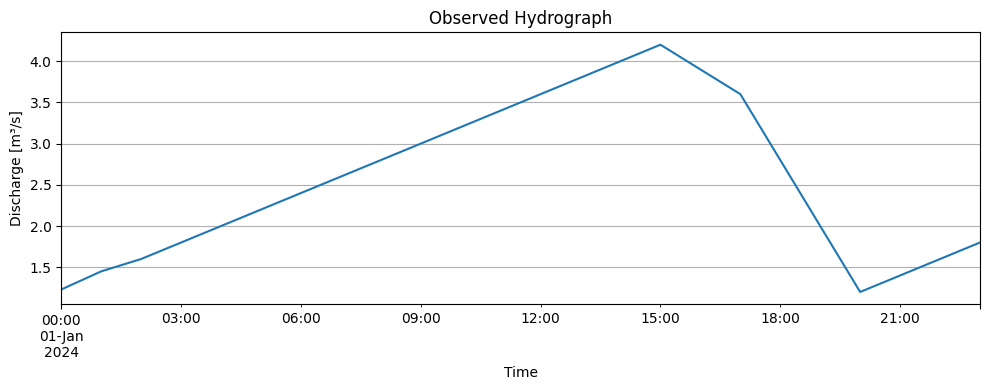

In [3]:
plt.figure(figsize=(10,4))
df["Q_obs"].plot()
plt.title("Observed Hydrograph")
plt.ylabel("Discharge [m³/s]")
plt.xlabel("Time")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
q = df["Q_obs"]

stats = {
    "Mean": q.mean(),
    "Median": q.median(),
    "Max": q.max(),
    "Q95": q.quantile(0.95),
    "Q05": q.quantile(0.05),
    "Count": q.count(),
}

stats

{'Mean': np.float64(2.5658333333333334),
 'Median': np.float64(2.5),
 'Max': np.float64(4.2),
 'Q95': np.float64(3.985),
 'Q05': np.float64(1.2555),
 'Count': np.int64(24)}

In [5]:
start = "2024-01-01"
end = "2024-01-03"

event_df = df.loc[start:end]
event_df.head()

,Q_obs
datetime,
2024-01-01 00:00:00,1.23
2024-01-01 01:00:00,1.45
2024-01-01 02:00:00,1.60
2024-01-01 03:00:00,1.80
2024-01-01 04:00:00,2.00


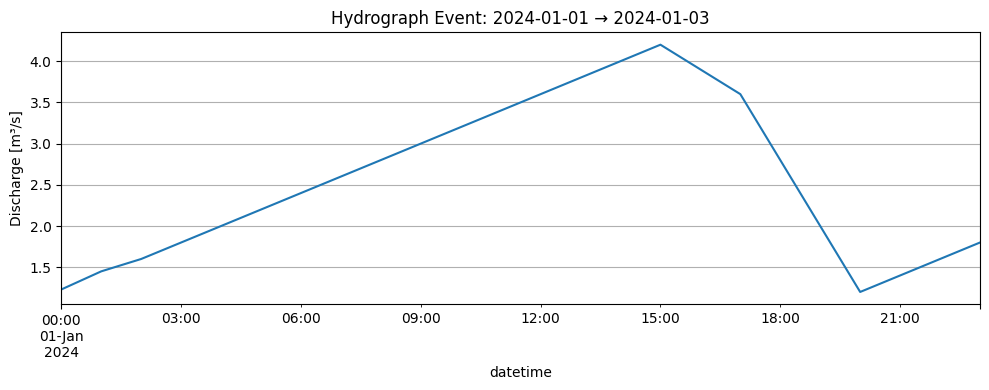

In [6]:
plt.figure(figsize=(10,4))
event_df["Q_obs"].plot()
plt.title(f"Hydrograph Event: {start} → {end}")
plt.ylabel("Discharge [m³/s]")
plt.grid(True)
plt.tight_layout()
plt.show()